# Bienvenido a tu primer proyecto como data analyst

Antes de iniciar aquí hay unos pasos que podrías seguir:

Dataset: https://www.kaggle.com/datasets/oktayrdeki/traffic-accidents

## 0. Librerías

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, pearsonr, ttest_1samp

## 1. Carga del dataset

In [23]:
# Cargar el archivo de datos
file_path = "traffic_accidents.csv"
df = pd.read_csv(file_path)

In [24]:
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


## Paso 1: Exploración inicial

In [25]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [27]:
# Mostrar nombres de columnas para verificar estructura
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [33]:
# Mostrar las primeras filas para entender los datos
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [29]:
# Mostrar las últimas filas
df.tail()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6
209305,12/16/2022 12:10:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,FOUR WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,12,6,12


In [30]:
# Estadísticas descriptivas del dataset
df.describe()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,2.063300,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,0.396012,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,11.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


## Paso 2: Limpieza y preparación de datos

In [34]:
# Convertir nombres de columnas a minúsculas para estandarización
df.columns = df.columns.str.lower()

In [35]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [37]:
# Verificación de valores nulos
df_valores_nulos = df.isnull().sum()
df_valores_nulos

,0
crash_date,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0


In [41]:
df[df.duplicated()]

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month


In [40]:
# Eliminación de duplicados para evitar datos redundantes
df = df.drop_duplicates()

### Conversión de tipos de datos

In [42]:
# Convertir la fecha de accidente a formato datetime
df['crash_date'] = pd.to_datetime(df['crash_date'])

/tmp/ipython-input-1987594117.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'])


In [46]:
# Manejo de valores ausentes, se asignan valores predeterminados cuando es necesario
df['road_defect'].unique()

array(['UNKNOWN', 'NO DEFECTS', 'OTHER', 'SHOULDER DEFECT',
       'WORN SURFACE', 'DEBRIS ON ROADWAY', 'RUT, HOLES'], dtype=object)

In [48]:
# Crear nuevas columnas basadas en la fecha del accidente
df['crash_year'] = df['crash_date'].dt.year
df['crash_day_of_week'] = df['crash_date'].dt.day

## Paso 3: Análisis de datos

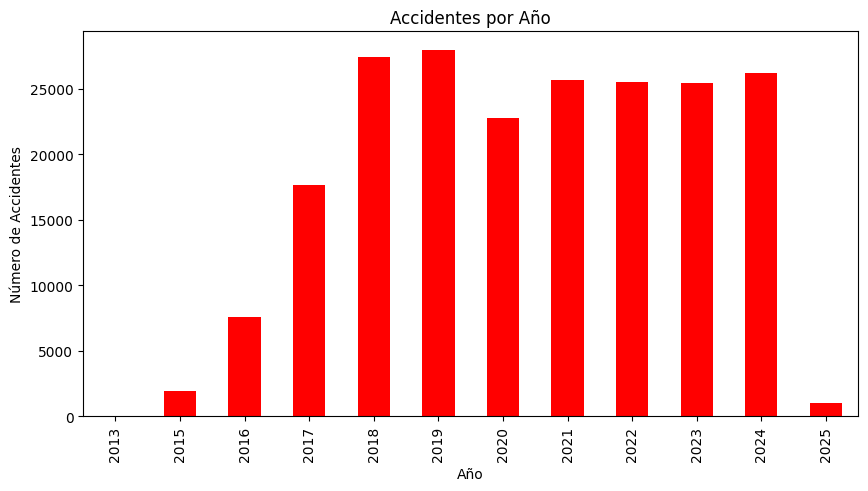

In [55]:
# Número de accidentes por año
accidentes_por_año = df.groupby('crash_year')['crash_year'].count()
# df['crash_year'].value_counts().sort_index()
#accidentes_por_año
plt.figure(figsize=(10,5))
accidentes_por_año.plot(kind='bar', color ='r')
plt.title('Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.show()

,crash_year
crash_year,
2013,2
2015,1917
2016,7614
2017,17655
2018,27430
2019,27957
2020,22777
2021,25689
2022,25540


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209275 entries, 0 to 209305
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     209275 non-null  datetime64[ns]
 1   traffic_control_device         209275 non-null  object        
 2   weather_condition              209275 non-null  object        
 3   lighting_condition             209275 non-null  object        
 4   first_crash_type               209275 non-null  object        
 5   trafficway_type                209275 non-null  object        
 6   alignment                      209275 non-null  object        
 7   roadway_surface_cond           209275 non-null  object        
 8   road_defect                    209275 non-null  object        
 9   crash_type                     209275 non-null  object        
 10  intersection_related_i         209275 non-null  object        
 11  damag

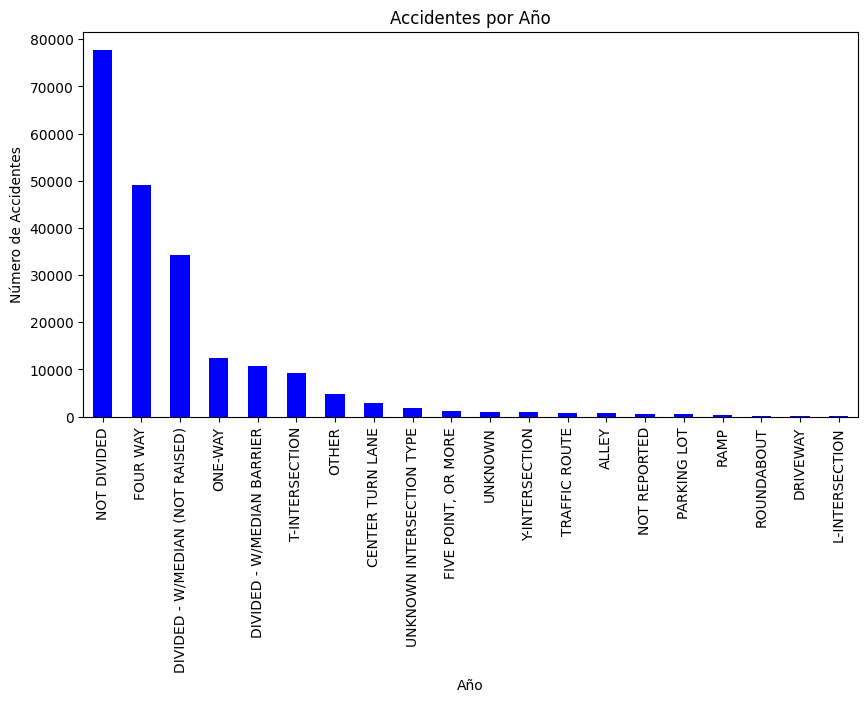

In [57]:
# Análisis de colisión por tipo de carretera
num_acc_por_tipo_carretera = df['trafficway_type'].value_counts()
plt.figure(figsize=(10,5))
num_acc_por_tipo_carretera.plot(kind='bar', color ='b')
plt.title('Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes')
plt.show()

In [22]:
# Análisis de lesiones totales con diagramas de caja


## Paso 5: Prueba de hipótesis

**Hipótesis 1:** ¿Difieren las lesiones en función de las condiciones climáticas?
- **_H0_**: No hay diferencia en el número de lesiones entre condiciones climáticas.
- **_H1_**: Sí hay una diferencia en el número de lesiones según el clima.

In [59]:
df['weather_condition'].unique()

array(['CLEAR', 'RAIN', 'SNOW', 'CLOUDY/OVERCAST', 'UNKNOWN',
       'FOG/SMOKE/HAZE', 'BLOWING SNOW', 'FREEZING RAIN/DRIZZLE', 'OTHER',
       'SLEET/HAIL', 'SEVERE CROSS WIND GATE', 'BLOWING SAND, SOIL, DIRT'],
      dtype=object)

In [62]:
clima_despejado = df[df['weather_condition']=='CLEAR']['injuries_total']
clima_no_despejado = df[df['weather_condition'] !='CLEAR']['injuries_total']
stat, p_value = ttest_ind(clima_despejado, clima_no_despejado)
print('Estadistico es ', stat)
print('El valor p es, ', p_value)

# Nivel de significancia es la probabilidad con la que rechazamos o no la hipotesis nula
# Nivel de significancia es 5%, 0.05

# Conclusión: Podemos rechazar la hipotesis nula y concluir que existe una diferencia en el numero de lesiones según el clima.
# Es decir, que si el día no está despejado, podemos decir que estadisticamente la cantidad de lesiones de un día NO despejdo, NO es igual a la cantidad de lesiones de un día despejado.

Estadistico es  8.454916429639432
El valor p es,  2.810447830047579e-17


**Hipótesis 2:** ¿El número promedio de lesiones es significativamente mayor que 1?
- **_H0_**: El número promedio de lesiones es igual o menor a 1.
- **_H1_**: El número promedio de lesiones es mayor a 1.

Prueba de hipótesis sobre el promedio de lesiones: p-valor = 0.00000


**Hipótesis 3:** Correlación entre la hora del accidente y número de lesiones
- **_H0_**: No hay correlación entre la hora del accidente y el número de lesiones.
- **_H1_**: Existe correlación entre la hora del accidente y el número de lesiones.

Correlación entre hora del accidente y lesiones: coeficiente = -0.015, p-valor = 0.00000


## Paso 6: Conclusión general

**Conclusión:** Se realizó una exploración exhaustiva de los datos, incluyendo validaciones, limpieza, visualización y pruebas de hipótesis para obtener información útil sobre los accidentes de tráfico.